<a href="https://colab.research.google.com/github/JasLieb/IML/blob/master/apercu_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMPREHENSIVE DATA EXPLORATION 

----------

In [0]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
#bring in the six packs
df_train = pd.read_csv('data/train.csv')
df_train.shape


(1460, 81)

In [0]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 2. Tout d'abord: analyser «SalePrice»


In [0]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

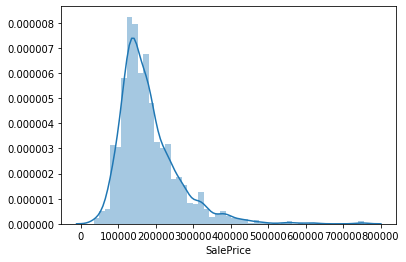

In [0]:

#histogram
sns.distplot(df_train['SalePrice']);


* * <b> Dévie de la distribution normale. </b> *
* * <b> Avoir une asymétrie positive appréciable. </b> *
* * <b> Afficher le pic. </b> *

* Cela devient intéressant! 'SalePrice', pourriez-vous me donner vos mensurations? '*

In [0]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# 'SalePrice', ses copains et ses centres d'intérêt


### Relationship with numerical variables

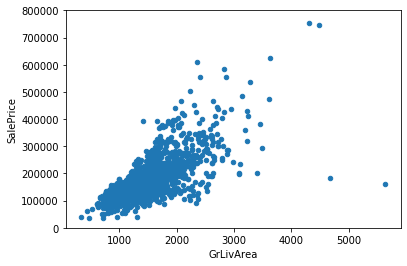

In [0]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'SalePrice' et 'GrLivArea' sont vraiment de vieux amis, avec une <b> relation linéaire. </b> *

* Et qu'en est-il de «TotalBsmtSF»? *

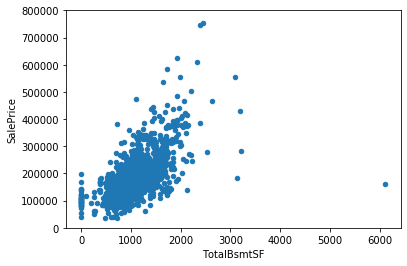

In [0]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

* 'TotalBsmtSF' est aussi un grand ami de 'SalePrice' <b> forte réaction linéaire (exponentielle?) </b>, tout change. De plus, il est clair que parfois «TotalBsmtSF» se ferme en lui-même et n'accorde aucun crédit à «SalePrice». *

### Relationship with categorical features

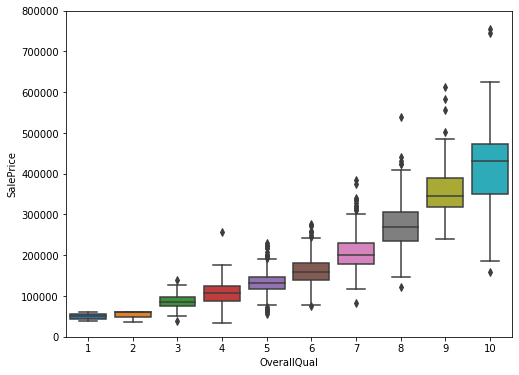

In [0]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

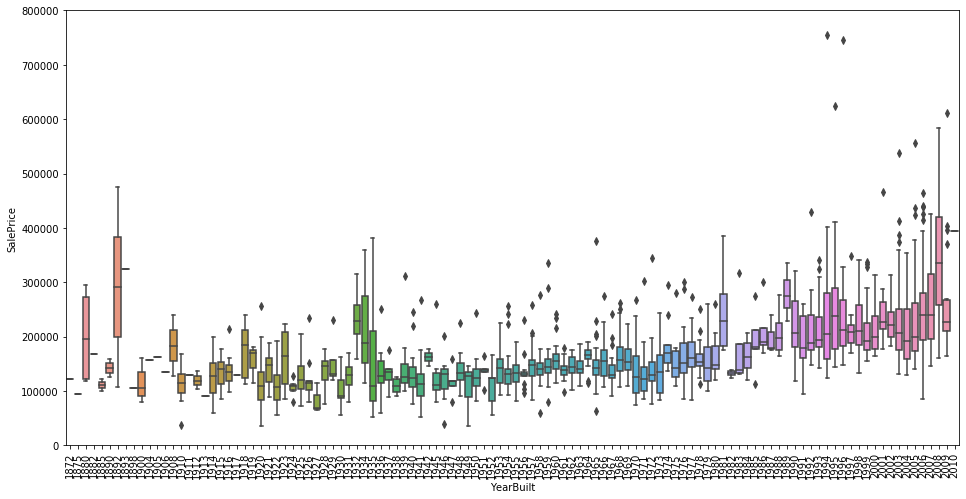

In [0]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

* Bien que ce ne soit pas une tendance forte, je dirais que 'SalePrice' est plus enclin à dépenser plus d'argent dans de nouvelles choses que dans d'anciennes reliques. *

<b> Remarque </b>: nous ne savons pas si "SalePrice" est en prix constants. Les prix constants tentent de supprimer l'effet de l'inflation. Si «SalePrice» n'est pas en prix constants, il devrait l'être, de sorte que les prix sont comparables au fil des ans.

### En résumé

Mis à part les histoires, nous pouvons conclure que:

* 'GrLivArea' et 'TotalBsmtSF' semblent être liés linéairement avec 'SalePrice'. Les deux relations sont positives, ce qui signifie qu'à mesure qu'une variable augmente, l'autre augmente également. Dans le cas de «TotalBsmtSF», nous pouvons voir que la pente de la relation linéaire est particulièrement élevée.
* 'GlobalQual' et 'YearBuilt' semblent également être liés à 'SalePrice'. La relation semble être plus forte dans le cas de «OverallQual», où le diagramme en boîte montre comment les prix de vente augmentent avec la qualité globale.

Nous venons d'analyser quatre variables, mais il y en a beaucoup d'autres que nous devons analyser. L'astuce ici semble être le choix des bonnes fonctionnalités (sélection des fonctionnalités) et non la définition de relations complexes entre elles (ingénierie des fonctionnalités).



# 3. le paysage 


* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

#### Correlation matrix (heatmap style)

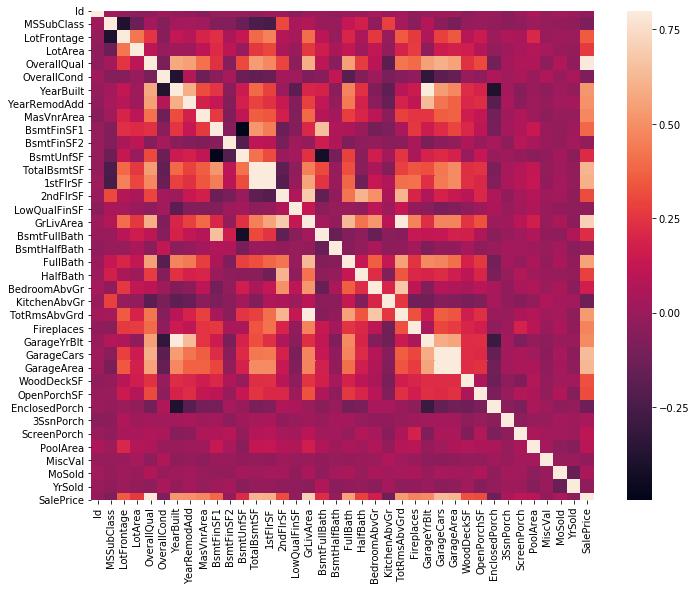

In [0]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

À mon avis, cette carte thermique est le meilleur moyen d'avoir un aperçu rapide de notre «soupe au plasma» et de ses relations. (Merci @seaborn!)

À première vue, deux carrés rouges attirent mon attention. Le premier fait référence aux variables «TotalBsmtSF» et «1stFlrSF», et le second fait référence aux variables «Garage * X *». Les deux cas montrent l'importance de la corrélation entre ces variables. En fait, cette corrélation est si forte qu'elle peut indiquer une situation de multicollinéarité. Si nous pensons à ces variables, nous pouvons conclure qu'elles donnent presque les mêmes informations, de sorte que la multicolinéarité se produit réellement. Les cartes thermiques sont parfaites pour détecter ce genre de situations et dans les problèmes dominés par la sélection des fonctionnalités, comme la nôtre, elles sont un outil essentiel.

Une autre chose qui a attiré mon attention a été les corrélations «SalePrice». Nous pouvons voir nos célèbres «GrLivArea», «TotalBsmtSF» et «OverallQual» dire un grand «Salut!», Mais nous pouvons également voir de nombreuses autres variables qui devraient être prises en compte. C'est ce que nous ferons ensuite.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

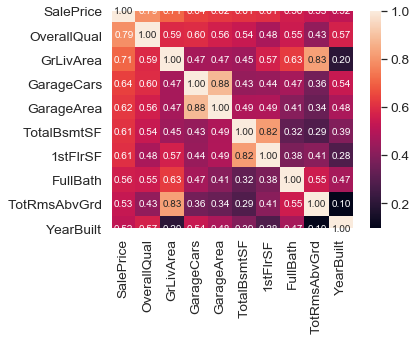

In [0]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 les variables les plus corrélées avec 'SalePrice'. Mes réflexions à ce sujet:

* 'OverallQual', 'GrLivArea' et 'TotalBsmtSF' sont fortement corrélés avec 'SalePrice'. Vérifier!
* 'GarageCars' et 'GarageArea' sont également quelques-unes des variables les plus fortement corrélées. Cependant, comme nous l'avons vu dans le dernier sous-point, le nombre de voitures qui rentrent dans le garage est une conséquence de la surface du garage. «GarageCars» et «GarageArea» sont comme des frères jumeaux. Vous ne pourrez jamais les distinguer. Par conséquent, nous avons juste besoin d'une de ces variables dans notre analyse (nous pouvons conserver «GarageCars» car sa corrélation avec «SalePrice» est plus élevée).
* 'TotalBsmtSF' et '1stFloor' semblent également être des frères jumeaux. Nous pouvons garder «TotalBsmtSF» juste pour dire que notre première supposition était juste (relire «Alors ... à quoi pouvons-nous nous attendre?»).
* 'FullBath' ?? Vraiment?
* 'TotRmsAbvGrd' et 'GrLivArea', frères jumeaux à nouveau. 

#### Scatter plots entre 'SalePrice' et correlated variables

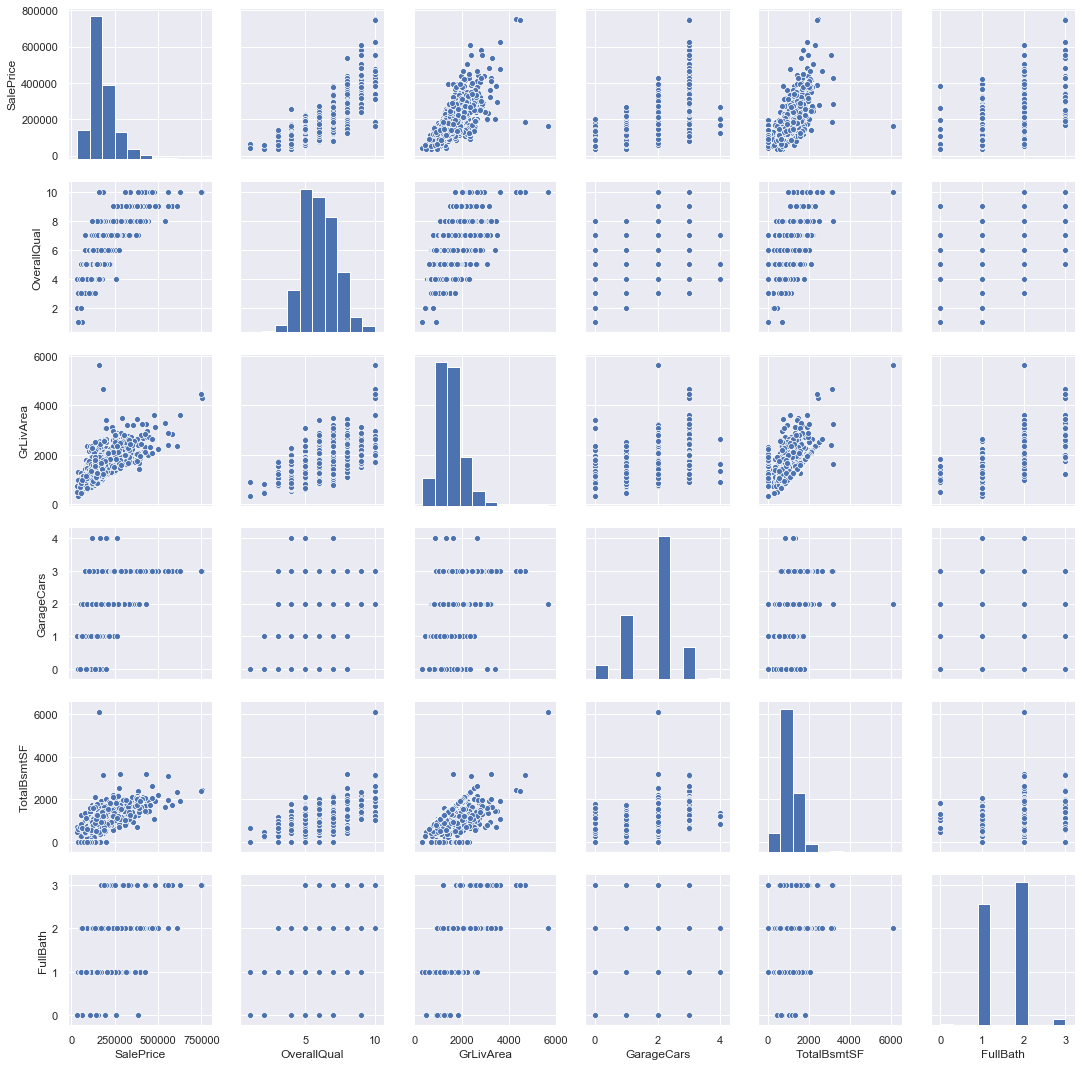

In [0]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [0]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)